# Proyecto del Día 9: Consulta de Temperaturas Interactivo por Ciudad y Mes

## Objetivo

El proyecto propuesto consistirá en la creación de un programa interactivo para la visualización de datos meteorológicos. Este programa permitirá a los usuarios visualizar los registros climáticos eligiendo el lugar y el més. El objetivo es aplicar los conceptos de creación de gráficos, personalización de estilos y combinarlo con las habilidades de desarrollo de programas con Python.

## Consigna

1. **Cargar un DataFrame** con los datos meteorológicos provistos en el archivo descargable de esta lección.
2. Asegúrate de que las **fechas** estén en el **formato correcto** para su manipulación posterior.
3. Crea un programa (una función o un conjunto de funciones) que le pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en nuestro DataFrame, y un **mes** del año.
4. Muéstrale al usuario un gráfico que muestre las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.
5. El programa debe preguntarle al usuario si desea seguir haciendo consultas o no.

**¡Mucha suerte!**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ruta = r'C:\Users\steph\Documents\CURSOS\ANALISIS Y CIENCIA DE DATOS\PYTHON PARA DATA SCIENCE-UDEMY\Día 9- Matplotlib\Datos+Meteorológicos_Arg_2023.csv'

In [3]:
df = pd.read_csv(ruta)
df.head(10)

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9
5,2/1/2023,Buenos Aires,31,15,0.0,10.6,67.1
6,2/1/2023,Cordoba,32,20,0.0,20.8,56.2
7,2/1/2023,Rosario,23,17,0.0,16.3,37.7
8,2/1/2023,Mendoza,34,19,0.0,39.7,36.1
9,2/1/2023,Tucuman,28,19,0.0,24.0,44.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 1825 non-null   object 
 1   Ciudad                1825 non-null   object 
 2   Temperatura Maxima    1825 non-null   int64  
 3   Temperatura Minima    1825 non-null   int64  
 4   Precipitacion         1825 non-null   float64
 5   Velocidad del Viento  1825 non-null   float64
 6   Humedad Relativa      1825 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 99.9+ KB


In [5]:
df.describe()

,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,17.827945,10.191233,11.469205,24.963945,59.251890
std,8.139477,6.540120,27.714274,8.640341,17.282792
min,2.000000,-3.000000,0.000000,10.000000,30.000000
25%,12.000000,6.000000,0.000000,17.900000,44.400000
50%,17.000000,10.000000,0.000000,24.900000,58.200000
75%,23.000000,15.000000,0.000000,32.300000,74.800000
max,36.000000,22.000000,119.500000,40.000000,90.000000


In [6]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df.head()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9


In [7]:
lista_ciudades = []

for c in df['Ciudad']:
    if c not in lista_ciudades:
        lista_ciudades.append(c)
    
lista_ciudades

['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']

In [8]:
meses = {1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio', 7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12: 'Diciembre'}
meses

{1: 'Enero',
 2: 'Febrero',
 3: 'Marzo',
 4: 'Abril',
 5: 'Mayo',
 6: 'Junio',
 7: 'Julio',
 8: 'Agosto',
 9: 'Septiembre',
 10: 'Octubre',
 11: 'Noviembre',
 12: 'Diciembre'}

In [9]:
def consultar_temperaturas():
    while True:
        
        print("\nCiudades disponibles: ", lista_ciudades)
        ciudad_elegida = input("Elija una ciudad de la lista: ").title()
        
        mes_elegido = int(input("Elija el número del mes (por ej. Enero = 1): "))
        
        if ciudad_elegida not in lista_ciudades or mes_elegido not in range(1, 13):
            print("Ciudad o mes no válidos. Inténtale nuevamente.")
            continue
        
        datos_ciudad_mes = df[(df['Ciudad'] == ciudad_elegida) & (df['Fecha'].dt.month == mes_elegido)]
        
        plt.figure(figsize=(10, 6))
        plt.plot(datos_ciudad_mes['Fecha'], datos_ciudad_mes['Temperatura Maxima'], label="Maxima", color="purple")
        plt.plot(datos_ciudad_mes['Fecha'], datos_ciudad_mes['Temperatura Minima'], label="Minima", color="blue")
        plt.title(f"Temperaturas en {ciudad_elegida} durante el mes de {meses[mes_elegido]}")
        plt.xlabel("Fecha")
        plt.ylabel("Temperatura")
        plt.legend()
        plt.xticks(rotation=90)
        plt.show()
        
        otra_consulta = input("¿Deseas hacer otra consulta? (s/n): ")
        if otra_consulta.lower() != 's':
            break


Ciudades disponibles:  ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']
Elija una ciudad de la lista: mendoza
Elija el número del mes (por ej. Enero = 1): 7


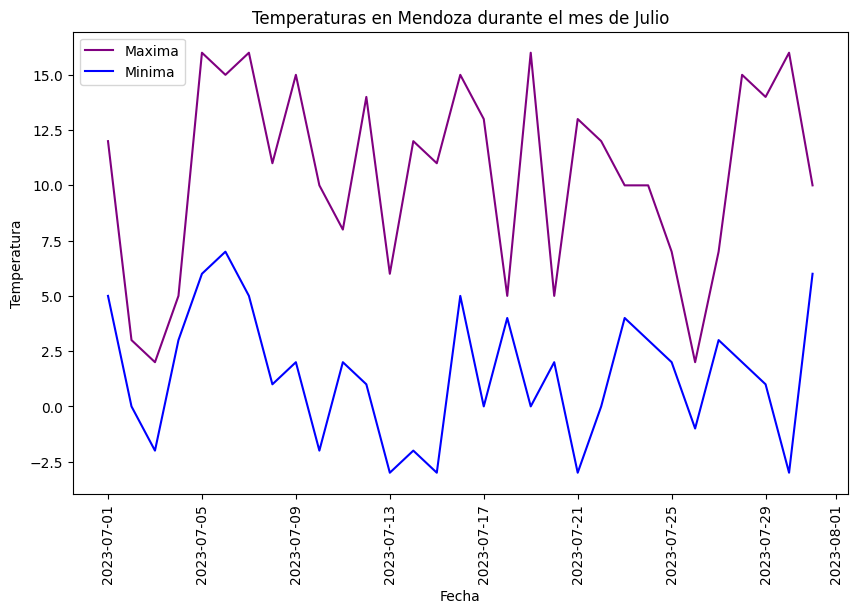

¿Deseas hacer otra consulta? (s/n): s

Ciudades disponibles:  ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']
Elija una ciudad de la lista: cordoba
Elija el número del mes (por ej. Enero = 1): 10


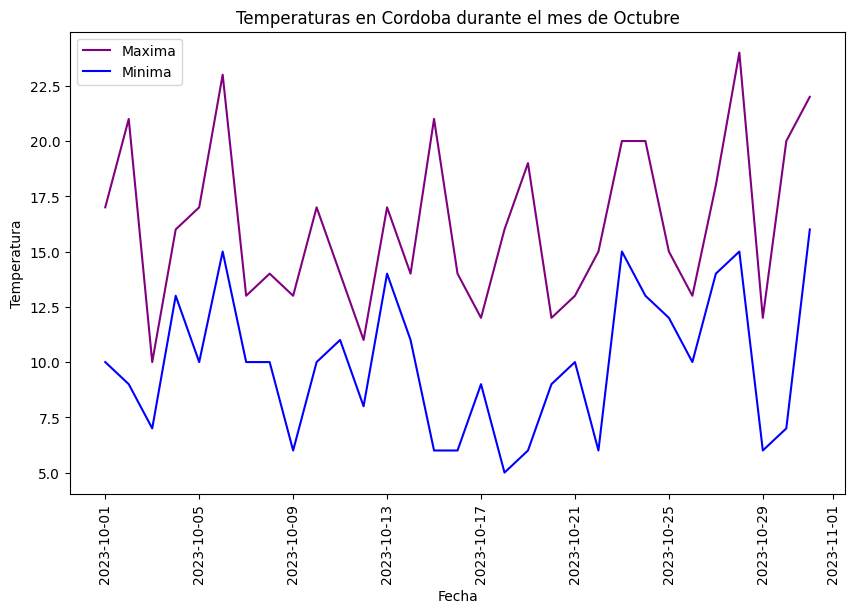

¿Deseas hacer otra consulta? (s/n): n


In [10]:
consultar_temperaturas()